In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
amex_train_path = "/content/drive/My Drive/Career/Duke Fuqua MQM/Term Fall 1/Data Science for Business/Term Project/AMEX/train.csv"
amex_test_path = "/content/drive/My Drive/Career/Duke Fuqua MQM/Term Fall 1/Data Science for Business/Term Project/AMEX/test.csv"

amex_train = pd.read_csv(amex_train_path)
amex_test = pd.read_csv(amex_test_path)

amex_train.head(5)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [ ]:
amex_test.head(5)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


# Data Mining

*   Handling Missing Values
*   Featuring engineering on categorical variables



In [ ]:
# Checking for missing values and proportion
missing_values = amex_train.isnull().sum()
missing_proportion = missing_values / len(amex_train)

print("Missing Values:\n", missing_values)
print("Missing Values and Proportions:\n", missing_proportion)

Missing Values:
 customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64
Missing Values and Proportions:
 customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   0.012015
owns_house                 0.000000
no_of_children             0.017001
net_yearly_income          0.000000
no_of_days_employed        0.010170
occupation_type         

In [ ]:
# Count the number of zeros in each column
zeros_count = (amex_train == 0).sum()

# Calculate the proportion of zeros in each column
zeros_proportion = zeros_count / len(amex_train) * 100

# Display result
zeros_df = pd.DataFrame({
    'Zeros Count': zeros_count,
    'Zeros Proportion (%)': zeros_proportion
})

zeros_df

,Zeros Count,Zeros Proportion (%)
customer_id,0,0.000000
name,0,0.000000
age,0,0.000000
gender,0,0.000000
owns_car,0,0.000000
owns_house,0,0.000000
no_of_children,31241,68.619311
net_yearly_income,0,0.000000
no_of_days_employed,0,0.000000
occupation_type,0,0.000000


In [ ]:
# Categorical columns (object type)
amex_train['owns_car'] = amex_train['owns_car'].fillna(amex_train['owns_car'].mode()[0])
amex_train['migrant_worker'] = amex_train['migrant_worker'].fillna(amex_train['migrant_worker'].mode()[0])

# Numerical columns (float64)
amex_train['no_of_children'] = amex_train['no_of_children'].fillna(amex_train['no_of_children'].median())
amex_train['no_of_days_employed'] = amex_train['no_of_days_employed'].fillna(amex_train['no_of_days_employed'].mean())
amex_train['total_family_members'] = amex_train['total_family_members'].fillna(amex_train['total_family_members'].median())
amex_train['yearly_debt_payments'] = amex_train['yearly_debt_payments'].fillna(amex_train['yearly_debt_payments'].mean())
amex_train['credit_score'] = amex_train['credit_score'].fillna(amex_train['credit_score'].median())

# Check if there are any remaining missing values
missing_values_after_filling = amex_train.isnull().sum()
missing_values_after_filling

,0
customer_id,0
name,0
age,0
gender,0
owns_car,0
owns_house,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
occupation_type,0


In [ ]:
# Convert categorical variables into dummy/indicator variables
amex_train_dummies = pd.get_dummies(amex_train, columns=['occupation_type', 'gender', 'owns_car', 'owns_house'], drop_first=True)

# Identify only the columns that were created as dummies
dummy_columns = [col for col in amex_train_dummies.columns if col.startswith(('occupation_type_', 'gender_', 'owns_car_', 'owns_house_'))]

# Convert only the dummy columns to integer type (in case they are boolean)
amex_train_dummies[dummy_columns] = amex_train_dummies[dummy_columns].astype(int)

print(amex_train_dummies.head())

  customer_id            name  age  no_of_children  net_yearly_income  \
0  CST_115179        ita Bose   46             0.0          107934.04   
1  CST_121920  Alper Jonathan   29             0.0          109862.62   
2  CST_109330     Umesh Desai   37             0.0          230153.17   
3  CST_128288             Rie   39             0.0          122325.82   
4  CST_151355          McCool   46             0.0          387286.00   

   no_of_days_employed  total_family_members  migrant_worker  \
0                612.0                   1.0             1.0   
1               2771.0                   2.0             0.0   
2                204.0                   2.0             0.0   
3              11941.0                   2.0             0.0   
4               1459.0                   1.0             0.0   

   yearly_debt_payments  credit_limit  ...  occupation_type_Realty agents  \
0              33070.28      18690.93  ...                              0   
1              15329.5

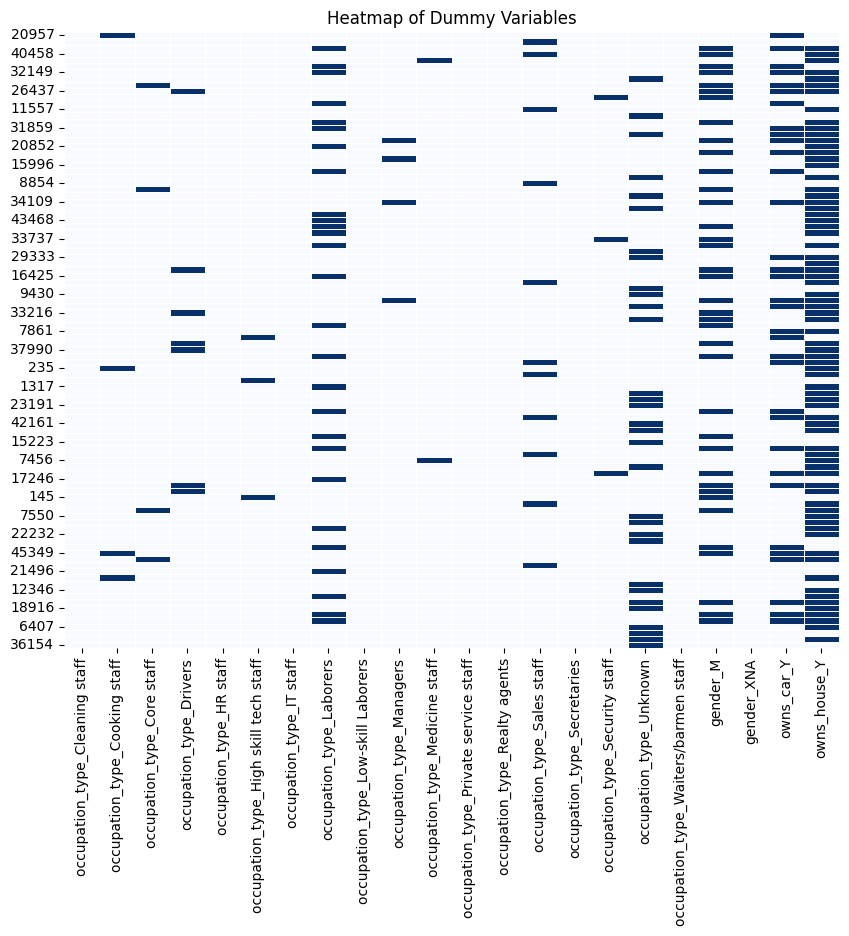

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a sample of the dummy columns to visualize
sample_data = amex_train_dummies[dummy_columns].sample(100)  # Sample 100 rows for better visualization

# Create a heatmap for binary dummy columns
plt.figure(figsize=(10, 8))
sns.heatmap(sample_data, cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Heatmap of Dummy Variables')
plt.show()


In [ ]:
# Dropping non-numeric columns before modeling, and stored resulting dataset back to 'amex_train'
# This cleaned dataframe will be basis of each machine learning models tested below

amex_train = amex_train_dummies.drop(['customer_id', 'name'], axis=1)

amex_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    45528 non-null  int64  
 1   no_of_children                         45528 non-null  float64
 2   net_yearly_income                      45528 non-null  float64
 3   no_of_days_employed                    45528 non-null  float64
 4   total_family_members                   45528 non-null  float64
 5   migrant_worker                         45528 non-null  float64
 6   yearly_debt_payments                   45528 non-null  float64
 7   credit_limit                           45528 non-null  float64
 8   credit_limit_used(%)                   45528 non-null  int64  
 9   credit_score                           45528 non-null  float64
 10  prev_defaults                          45528 non-null  int64  
 11  de

# Multilinear Regression


*   Ordinary Least Square Regression (OLS)
  *  more aligned with traditional statistics, offering a full statistical summary of the model
*   Linear Regression
  * focused on prediction and is less concerned with detailed statistical analysis


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initial Multilinear Regression
# Fit the linear model: prepare X and Y
X = amex_train_dummies.drop(columns=['customer_id', 'name', 'credit_card_default'])
Y = amex_train_dummies['credit_card_default']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     credit_card_default   R-squared:                       0.703
Model:                             OLS   Adj. R-squared:                  0.702
Method:                  Least Squares   F-statistic:                     3162.
Date:                 Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                         21:11:33   Log-Likelihood:                 22094.
No. Observations:                45528   AIC:                        -4.412e+04
Df Residuals:                    45493   BIC:                        -4.381e+04
Df Model:                           34                                         
Covariance Type:             nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Prepare X and Y for regression
X = amex_train_dummies.drop(['customer_id', 'name', 'credit_card_default'], axis=1)
y = amex_train_dummies['credit_card_default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Calculate RMSE and R-squared for the training set
train_rmse = root_mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate RMSE and R-squared for the test set
test_rmse = root_mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training R-squared: {train_r2}")
print(f"Training RMSE: {train_rmse}" + "\n")

print(f"Test R-squared: {test_r2}")
print(f"Test RMSE: {test_rmse}")

Training R-squared: 0.7017268471693675
Training RMSE: 0.1484488806491161

Test R-squared: 0.705933686969531
Test RMSE: 0.15096455228636782


# K-fold cross validation for Linear Regression
We want to ensure the model generalizes well across different subsets of the data.

This can help fine-tune hyperparameters and avoid overfitting.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Define your linear regression model
model = LinearRegression()

# Define k-fold cross-validation parameters (10 folds in this case)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation for R-squared
r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
print(f"Cross-validated R-squared scores: {r2_scores}")
print(f"Average R-squared score: {np.mean(r2_scores)}")

# Create a custom scorer for RMSE using the correct function without deprecated warning
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_scorer = make_scorer(rmse)

# Perform cross-validation for RMSE
rmse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=rmse_scorer)
print(f"Cross-validated RMSE scores: {rmse_scores}")
print(f"Average RMSE score: {np.mean(rmse_scores)}")

Cross-validated R-squared scores: [0.67912184 0.70833012 0.66808273 0.702245   0.7244355  0.71237566
 0.69157399 0.67683219 0.67681587 0.75936737]
Average R-squared score: 0.6999180278190482


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Cross-validated RMSE scores: [0.14964537 0.15178664 0.14886204 0.14979364 0.14584408 0.15204069
 0.14819139 0.15144397 0.15341324 0.1344555 ]
Average RMSE score: 0.14854765679518206


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# LASSO

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

X = amex_train_dummies.drop(columns=['customer_id', 'name', 'credit_card_default'])  # All features except the target
y = amex_train_dummies['credit_card_default']  # Target variable

scaler = StandardScaler()

# Fit and transform the features to standardize them
X_scaled = scaler.fit_transform(X)

# Run LASSO with cross-validation to find the best alpha (regularization parameter)
lasso = LassoCV(cv=10, random_state=42)
lasso.fit(X_scaled, y)

# Print the best alpha found during cross-validation
print("Best alpha (regularization strength) from cross-validation:", lasso.alpha_)

# Make predictions
y_pred = lasso.predict(X_scaled)

# Calculate R-squared and RMSE
r_squared = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)  # squared=False gives RMSE

print("R-squared:", r_squared)
print("RMSE:", rmse)

Best alpha (regularization strength) from cross-validation: 0.00021198270786149185
R-squared: 0.7026483013370449
RMSE: 0.1489465636350568


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Prepare the features and target variable
X = amex_train_dummies.drop(columns=['customer_id', 'name', 'credit_card_default'])  # All features except the target
y = amex_train_dummies['credit_card_default']  # Target variable

scaler = StandardScaler()

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training features to standardize them
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run LASSO with cross-validation on the training data to find the best alpha
lasso = LassoCV(cv=10, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Print the best alpha found during cross-validation
print("Best alpha (regularization strength) from cross-validation:", lasso.alpha_)

# Make predictions on the training set
y_train_pred = lasso.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred = lasso.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
train_r_squared = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate R-squared and RMSE for the testing set
test_r_squared = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the results
print("Training R-squared:", train_r_squared)
print("Training RMSE:", train_rmse)
print("Test R-squared:", test_r_squared)
print("Test RMSE:", test_rmse)

# Optionally, use k-fold cross-validation on the entire training set if needed
kf = KFold(n_splits=10, shuffle=True, random_state=42)


Best alpha (regularization strength) from cross-validation: 0.00021116215118943782
Training R-squared: 0.7016962015132633
Training RMSE: 0.1484565065391016
Test R-squared: 0.7059729198131481
Test RMSE: 0.15095448148606058


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Logistic Regression

SMOTE: creates synthetic data points for the minority class (credit card default = 1) so that the model is trained on a more balanced dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Install imbalanced-learn for SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
# Define the features (X) and target variable (y)
X = amex_train.drop(columns=['credit_card_default'])  # Drop the target variable
y = amex_train['credit_card_default']  # Target variable

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Set max_iter to a higher value to ensure convergence

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print a classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 97.85%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8335
           1       0.96      0.78      0.86       771

    accuracy                           0.98      9106
   macro avg       0.97      0.89      0.92      9106
weighted avg       0.98      0.98      0.98      9106

Confusion Matrix:
 [[8311   24]
 [ 172  599]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# K-fold for Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the features (X) and target variable (y)
X = amex_train.drop(columns=['credit_card_default'])
y = amex_train['credit_card_default']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the logistic regression model with increased max_iter
log_reg = LogisticRegression(solver='lbfgs', max_iter=2000)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=10, scoring='accuracy')

# Print the cross-validation scores and the average
print("Cross-validated accuracy scores:", cv_scores)
print("Average cross-validated accuracy:", cv_scores.mean())


Cross-validated accuracy scores: [0.97737755 0.97803646 0.98133099 0.97847573 0.98067208 0.97957391
 0.98045245 0.97957391 0.97869069 0.97913005]
Average cross-validated accuracy: 0.9793313819621817


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = amex_train.drop(columns=['credit_card_default'])  # Exclude the target variable from features
y = amex_train['credit_card_default']  # Target variable (credit_card_default)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=500, random_state=42)  # Adjust n_estimators if needed
rf_model.fit(X_train, y_train)

# Predictions on the test data
y_pred = rf_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 98.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8367
           1       0.99      0.77      0.86       739

    accuracy                           0.98      9106
   macro avg       0.98      0.88      0.93      9106
weighted avg       0.98      0.98      0.98      9106

Confusion Matrix:
[[8361    6]
 [ 172  567]]


# K-fold for Random Forest

K-fold result aligns with simple Random Forest performance

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the features (X) and target variable (y)
X = amex_train.drop(columns=["credit_card_default"])  # Drop the target variable
y = amex_train["credit_card_default"]  # Target variable

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Perform k-fold cross-validation (using 10 folds)
# Use accuracy as the scoring metric
cross_val_scores = cross_val_score(rf_model, X, y, cv=10, scoring=make_scorer(accuracy_score))

# Print the cross-validated accuracy scores
print("Cross-validated accuracy scores:", cross_val_scores)
print("Average cross-validated accuracy:", cross_val_scores.mean())



Cross-validated accuracy scores: [0.97847573 0.98001318 0.98177026 0.97825609 0.98220953 0.98155063
 0.98155063 0.97957391 0.98044815 0.98000879]
Average cross-validated accuracy: 0.9803856898076434


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)



                                       importance
credit_score                             0.405166
prev_defaults                            0.190876
default_in_last_6months                  0.163607
credit_limit_used(%)                     0.075308
no_of_days_employed                      0.027692
credit_limit                             0.025694
yearly_debt_payments                     0.025248
net_yearly_income                        0.024917
age                                      0.018945
total_family_members                     0.007121
no_of_children                           0.005111
owns_house_Y                             0.003885
owns_car_Y                               0.003637
gender_M                                 0.003438
migrant_worker                           0.003047
occupation_type_Laborers                 0.002243
occupation_type_Unknown                  0.001856
occupation_type_Sales staff              0.001723
occupation_type_Drivers                  0.001421


Shape of X_train: (36422, 34)
Length of feature_importances_: 34


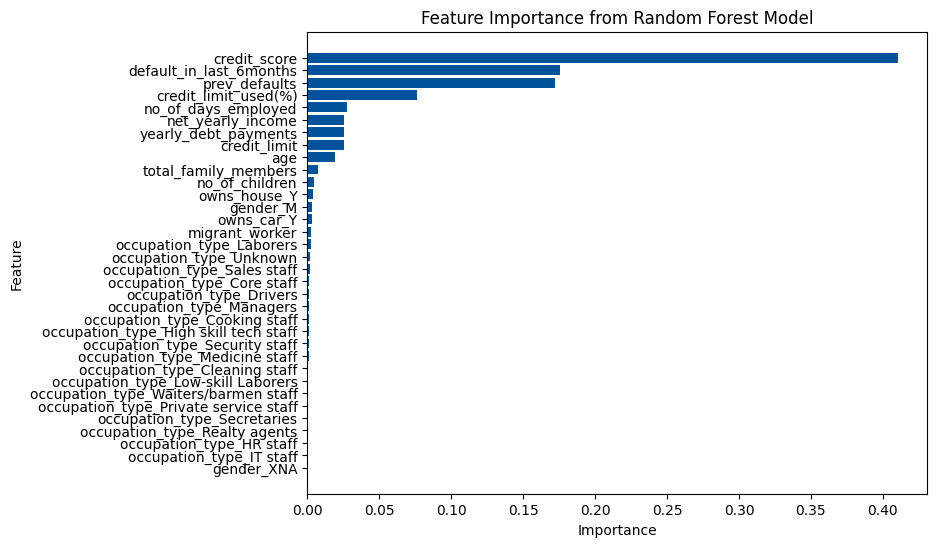

In [ ]:
# Assuming X_train is the feature set used for training the model
# Check the shape of X_train and feature importances
print(f"Shape of X_train: {X_train.shape}")
print(f"Length of feature_importances_: {len(rf_model.feature_importances_)}")

# Get feature names from X_train directly
feature_names = X_train.columns

# Now create the DataFrame for feature importance
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})

# Sort the features by importance
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='#00539B')
plt.xlabel('Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.title('Feature Importance from Random Forest Model', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have most important features at the top
plt.show()


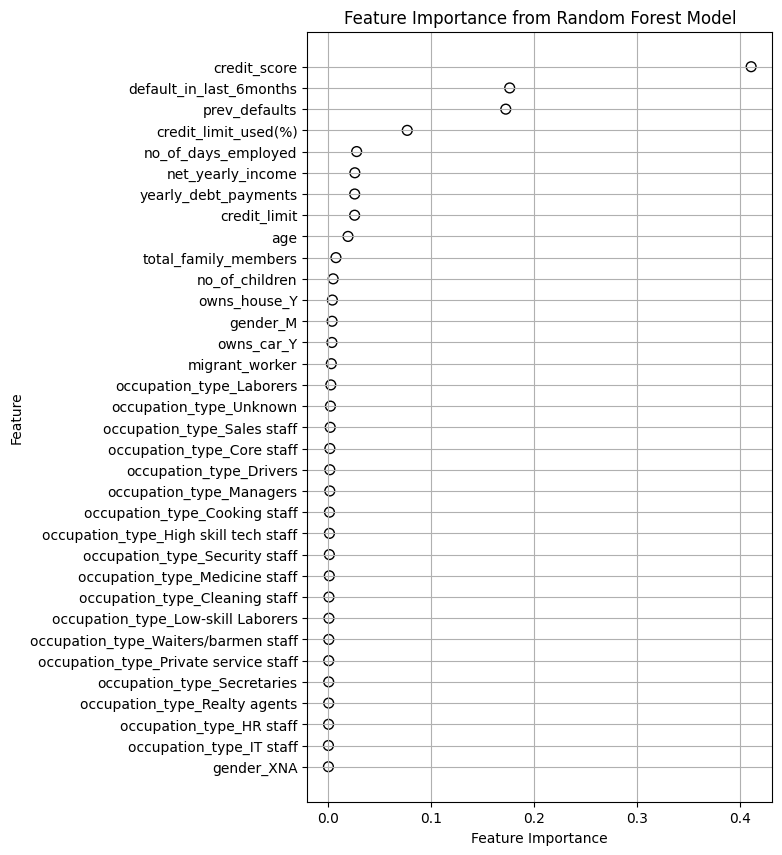

In [ ]:
import matplotlib.pyplot as plt

# Sort the feature importances in descending order
sorted_idx = rf_model.feature_importances_.argsort()

# Plot the feature importances using scatter plot with hollow circles
plt.figure(figsize=(6, 10))
plt.scatter(rf_model.feature_importances_[sorted_idx], range(len(rf_model.feature_importances_)), facecolors = 'none', edgecolors = 'black', s = 50)  # Hollow dots
plt.yticks(range(len(rf_model.feature_importances_)), X_train.columns[sorted_idx])

plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.title('Feature Importance from Random Forest Model', fontsize=12)
plt.grid(True)
plt.show()


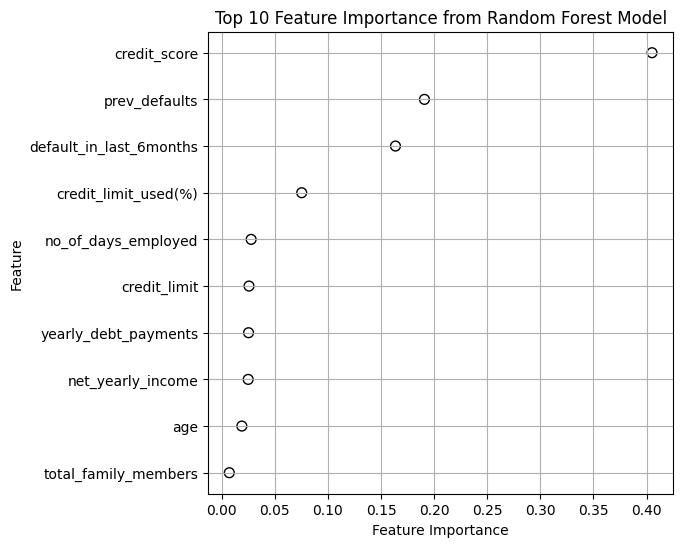

In [ ]:
import matplotlib.pyplot as plt

# Sort the feature importances in descending order and get the top 10
sorted_idx = rf_model.feature_importances_.argsort()[-10:]

# Plot the feature importances using scatter plot with hollow circles for the top 10 features
plt.figure(figsize=(6, 6))
plt.scatter(rf_model.feature_importances_[sorted_idx], range(10), facecolors='none', edgecolors='black', s=50)  # Hollow black dots
plt.yticks(range(10), X_train.columns[sorted_idx])

plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.title('Top 10 Feature Importance from Random Forest Model', fontsize=12)

# Add gridlines
plt.grid(True)

plt.show()

# Random Forest: SHAP value Analysis

# Decision Tree: CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [ ]:
# Define the features (X) and target variable (y)
X = amex_train.drop(columns=["credit_card_default"])  # Drop the target variable
y = amex_train["credit_card_default"]  # Target variable

# Limit the depth of the decision tree
dt_model_pruned = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth as needed

# Train the model
dt_model_pruned.fit(X, y)

# Make predictions
y_pred_pruned = dt_model_pruned.predict(X)

# Evaluate the performance
accuracy_pruned = accuracy_score(y, y_pred_pruned)
print(f"Accuracy (with pruning): {accuracy_pruned * 100:.2f}%")
print("Classification Report (with pruning):")
print(classification_report(y, y_pred_pruned))

# Confusion matrix
conf_matrix_pruned = confusion_matrix(y, y_pred_pruned)
print("Confusion Matrix (with pruning):")
print(conf_matrix_pruned)

Accuracy (with pruning): 98.06%
Classification Report (with pruning):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     41831
           1       1.00      0.76      0.86      3697

    accuracy                           0.98     45528
   macro avg       0.99      0.88      0.93     45528
weighted avg       0.98      0.98      0.98     45528

Confusion Matrix (with pruning):
[[41830     1]
 [  882  2815]]


In [ ]:
# Perform k-fold cross-validation on the pruned model
cross_val_scores_pruned = cross_val_score(dt_model_pruned, X, y, cv=10, scoring='accuracy')

# Print the cross-validated accuracy scores
print("Cross-validated accuracy scores (with pruning):", cross_val_scores_pruned)
print("Average cross-validated accuracy (with pruning):", cross_val_scores_pruned.mean())


Cross-validated accuracy scores (with pruning): [0.97847573 0.97957391 0.98177026 0.97869537 0.9819899  0.98220953
 0.98133099 0.97957391 0.98110721 0.98022847]
Average cross-validated accuracy (with pruning): 0.9804955268103805


In [ ]:
# Splitting the dataset into train and test sets (assuming 'amex_train' is your dataset)
X = amex_train.drop(columns=['credit_card_default'])  # Independent variables
y = amex_train['credit_card_default']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree (CART) model
cart_model = DecisionTreeClassifier(random_state=42, max_depth=None)  # You can set max_depth for pruning
cart_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cart_model.predict(X_test)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9722161212387437
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8335
           1       0.83      0.84      0.84       771

    accuracy                           0.97      9106
   macro avg       0.91      0.91      0.91      9106
weighted avg       0.97      0.97      0.97      9106

Confusion Matrix:
[[8205  130]
 [ 123  648]]


In [ ]:
# Split the data into training and test sets
X = amex_train.drop('credit_card_default', axis=1)
y = amex_train['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model with max_depth to prune the tree
dt_pruned = DecisionTreeClassifier(max_depth=10, random_state=42)  # You can adjust max_depth for pruning
dt_pruned.fit(X_train, y_train)

# Predict on the test set
y_pred_pruned = dt_pruned.predict(X_test)

# Evaluate the model's performance
print("Accuracy (Test Set):", dt_pruned.score(X_test, y_test))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_pruned))
print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_pruned))

Accuracy (Test Set): 0.9782560948824951
Confusion Matrix (Test Set):
 [[8305   30]
 [ 168  603]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8335
           1       0.95      0.78      0.86       771

    accuracy                           0.98      9106
   macro avg       0.97      0.89      0.92      9106
weighted avg       0.98      0.98      0.98      9106



# K-fold for CART

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
# Perform K-fold cross-validation with the pruned tree
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val_scores = cross_val_score(dt_pruned, X_train, y_train, cv=kf)

print("Cross-validated accuracy scores:", cross_val_scores)
print("Average cross-validated accuracy:", cross_val_scores.mean())

Cross-validated accuracy scores: [0.97804008 0.97611858 0.97913234 0.97721032 0.97830862 0.97446458
 0.97913234 0.97721032 0.97473915 0.97995607]
Average cross-validated accuracy: 0.97743124221141


# Model Comparison

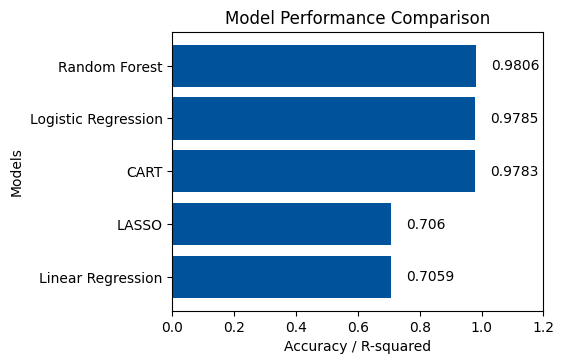

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracy/R-squared scores
models = ['Linear Regression', 'LASSO', 'Logistic Regression', 'Random Forest', 'CART']
accuracy_scores = [0.7059, 0.7060, 0.9785, 0.9806, 0.9783]  # R-squared for regression and accuracy for classification

# Sort the models and accuracy scores in descending order of accuracy
sorted_indices = sorted(range(len(accuracy_scores)), key=lambda i: accuracy_scores[i], reverse=True)
models_sorted = [models[i] for i in sorted_indices]
accuracy_scores_sorted = [accuracy_scores[i] for i in sorted_indices]

# Create a horizontal bar chart
plt.figure(figsize=(6, 4))
plt.barh(models_sorted, accuracy_scores_sorted, color='#00539B')  # Duke Blue color: #00539B

# Add title and labels with updated fontsize
plt.title('Model Performance Comparison', fontsize=12)
plt.xlabel('Accuracy / R-squared', fontsize=10)
plt.ylabel('Models', fontsize=10)

# Show the accuracy/R-squared values on the bars with added space
for i, v in enumerate(accuracy_scores_sorted):
    plt.text(v + 0.05, i, str(round(v, 4)), va='center', fontsize=10)  # Added more space with `v + 0.05`

plt.xlim(0, 1.2)  # Set the x-axis limit to range from 0 to 1.2 to provide extra space for labels
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Adjust layout to add more space around the chart
plt.tight_layout(pad=2)  # Adjust the padding to add space around the entire chart
plt.show()
